In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

## Step 1 : Data Preparation

In [2]:
# Loading Dataset
data = pd.read_csv("C:/Users/USER/Desktop/Labwork 2/winequality.csv")


In [3]:
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,R
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,R
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,R
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,W
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,W
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,W
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,W


In [4]:
# Data Preprocessing
from sklearn import preprocessing
Label = preprocessing.LabelEncoder()
wineType = Label.fit_transform(data["type"])
data["type"] = wineType
data = data.drop(data.columns[0], axis=1)

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [6]:
# Splitting the data into Training, Validation and Testing sets
train, test = train_test_split(data, random_state=42, test_size=0.3)
X_train = train[train.columns[0:12]]
y_train = train['type']
X_test = test[test.columns[0:12]]
y_test = test['type']
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Step 2: Model Development

In [7]:
# Create 5 model 
model1 = Sequential()
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()
model5 = Sequential()

In [8]:
# Set hyperparameters
hidden_layer_act = 'relu'
output_layer_act = 'sigmoid'
no_epochs = 100

# Model 1 Layer addition
model1.add(Dense(100, input_dim=12, activation=hidden_layer_act))
model1.add(Dense(100, activation=hidden_layer_act))
model1.add(Dense(1, activation=output_layer_act))

# Model 2 Layer addition
model2.add(Dense(128, activation='relu', input_dim=12))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation=output_layer_act))

# Model 3 Layer addition
model3.add(Dense(256, activation='relu', input_dim=12))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation=output_layer_act))

# Model 4 Layer addition
model4.add(Dense(64, activation='relu', input_dim=12))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation=output_layer_act))

# Model 5 Layer addition
model5.add(Dense(32, activation='relu', input_dim=12))
model5.add(Dense(16, activation='relu'))
model5.add(Dense(1, activation=output_layer_act))


In [9]:
# Compilation
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [10]:
# Fit the model 1
history1 = model1.fit(X_train, y_train, epochs=no_epochs, batch_size=len(train), validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
1/1 - 2s - loss: 1.6395 - acc: 0.7587 - val_loss: 1.1911 - val_acc: 0.7405 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 1.0158 - acc: 0.7587 - val_loss: 0.5121 - val_acc: 0.7610 - 64ms/epoch - 64ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4391 - acc: 0.7838 - val_loss: 1.4671 - val_acc: 0.3077 - 56ms/epoch - 56ms/step
Epoch 4/100
1/1 - 0s - loss: 1.5048 - acc: 0.2914 - val_loss: 0.4169 - val_acc: 0.8246 - 44ms/epoch - 44ms/step
Epoch 5/100
1/1 - 0s - loss: 0.4069 - acc: 0.8157 - val_loss: 0.3651 - val_acc: 0.8421 - 66ms/epoch - 66ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3088 - acc: 0.8700 - val_loss: 0.5096 - val_acc: 0.8103 - 63ms/epoch - 63ms/step
Epoch 7/100
1/1 - 0s - loss: 0.4198 - acc: 0.8381 - val_loss: 0.6178 - val_acc: 0.8031 - 69ms/epoch - 69ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5057 - acc: 0.8293 - val_loss: 0.6721 - val_acc: 0.8072 - 58ms/epoch - 58ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5476 - acc: 0.8311 - val_loss: 0.6777 - val_acc: 0.8154 - 52ms/epoch - 52ms/s

Epoch 74/100
1/1 - 0s - loss: 0.1755 - acc: 0.9369 - val_loss: 0.2222 - val_acc: 0.9231 - 47ms/epoch - 47ms/step
Epoch 75/100
1/1 - 0s - loss: 0.1748 - acc: 0.9369 - val_loss: 0.2226 - val_acc: 0.9241 - 47ms/epoch - 47ms/step
Epoch 76/100
1/1 - 0s - loss: 0.1743 - acc: 0.9378 - val_loss: 0.2227 - val_acc: 0.9251 - 50ms/epoch - 50ms/step
Epoch 77/100
1/1 - 0s - loss: 0.1740 - acc: 0.9371 - val_loss: 0.2224 - val_acc: 0.9251 - 55ms/epoch - 55ms/step
Epoch 78/100
1/1 - 0s - loss: 0.1735 - acc: 0.9371 - val_loss: 0.2216 - val_acc: 0.9251 - 46ms/epoch - 46ms/step
Epoch 79/100
1/1 - 0s - loss: 0.1729 - acc: 0.9371 - val_loss: 0.2204 - val_acc: 0.9251 - 45ms/epoch - 45ms/step
Epoch 80/100
1/1 - 0s - loss: 0.1723 - acc: 0.9371 - val_loss: 0.2192 - val_acc: 0.9251 - 47ms/epoch - 47ms/step
Epoch 81/100
1/1 - 0s - loss: 0.1717 - acc: 0.9380 - val_loss: 0.2182 - val_acc: 0.9251 - 47ms/epoch - 47ms/step
Epoch 82/100
1/1 - 0s - loss: 0.1714 - acc: 0.9382 - val_loss: 0.2175 - val_acc: 0.9262 - 48ms/e

In [11]:
# Fit model 2
history2 = model2.fit(X_train, y_train, epochs=no_epochs, batch_size=len(train), validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
1/1 - 1s - loss: 11.4991 - acc: 0.2413 - val_loss: 7.0399 - val_acc: 0.2595 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 7.2450 - acc: 0.2413 - val_loss: 3.0558 - val_acc: 0.2574 - 75ms/epoch - 75ms/step
Epoch 3/100
1/1 - 0s - loss: 3.1380 - acc: 0.2395 - val_loss: 0.4690 - val_acc: 0.8051 - 51ms/epoch - 51ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4345 - acc: 0.8304 - val_loss: 0.6345 - val_acc: 0.7836 - 58ms/epoch - 58ms/step
Epoch 5/100
1/1 - 0s - loss: 0.5364 - acc: 0.8080 - val_loss: 0.8927 - val_acc: 0.7795 - 61ms/epoch - 61ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7482 - acc: 0.8045 - val_loss: 1.0814 - val_acc: 0.7795 - 72ms/epoch - 72ms/step
Epoch 7/100
1/1 - 0s - loss: 0.9019 - acc: 0.8047 - val_loss: 1.2098 - val_acc: 0.7826 - 63ms/epoch - 63ms/step
Epoch 8/100
1/1 - 0s - loss: 1.0045 - acc: 0.8060 - val_loss: 1.2865 - val_acc: 0.7836 - 60ms/epoch - 60ms/step
Epoch 9/100
1/1 - 0s - loss: 1.0634 - acc: 0.8082 - val_loss: 1.3200 - val_acc: 0.7897 - 49ms/epoch - 49ms/

Epoch 74/100
1/1 - 0s - loss: 0.1755 - acc: 0.9382 - val_loss: 0.2196 - val_acc: 0.9262 - 40ms/epoch - 40ms/step
Epoch 75/100
1/1 - 0s - loss: 0.1749 - acc: 0.9384 - val_loss: 0.2187 - val_acc: 0.9251 - 47ms/epoch - 47ms/step
Epoch 76/100
1/1 - 0s - loss: 0.1738 - acc: 0.9384 - val_loss: 0.2186 - val_acc: 0.9251 - 50ms/epoch - 50ms/step
Epoch 77/100
1/1 - 0s - loss: 0.1725 - acc: 0.9391 - val_loss: 0.2198 - val_acc: 0.9251 - 43ms/epoch - 43ms/step
Epoch 78/100
1/1 - 0s - loss: 0.1722 - acc: 0.9404 - val_loss: 0.2205 - val_acc: 0.9251 - 47ms/epoch - 47ms/step
Epoch 79/100
1/1 - 0s - loss: 0.1722 - acc: 0.9402 - val_loss: 0.2196 - val_acc: 0.9231 - 38ms/epoch - 38ms/step
Epoch 80/100
1/1 - 0s - loss: 0.1715 - acc: 0.9402 - val_loss: 0.2174 - val_acc: 0.9251 - 51ms/epoch - 51ms/step
Epoch 81/100
1/1 - 0s - loss: 0.1704 - acc: 0.9400 - val_loss: 0.2151 - val_acc: 0.9272 - 45ms/epoch - 45ms/step
Epoch 82/100
1/1 - 0s - loss: 0.1696 - acc: 0.9406 - val_loss: 0.2135 - val_acc: 0.9272 - 51ms/e

In [12]:
history3 = model3.fit(X_train, y_train, epochs=no_epochs, batch_size=len(train), validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.5962 - acc: 0.7587 - val_loss: 3.9668 - val_acc: 0.2482 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 4.0751 - acc: 0.2331 - val_loss: 0.4542 - val_acc: 0.7682 - 57ms/epoch - 57ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4199 - acc: 0.8032 - val_loss: 0.7205 - val_acc: 0.7538 - 60ms/epoch - 60ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6023 - acc: 0.7816 - val_loss: 1.0003 - val_acc: 0.7590 - 55ms/epoch - 55ms/step
Epoch 5/100
1/1 - 0s - loss: 0.8258 - acc: 0.7858 - val_loss: 1.1420 - val_acc: 0.7692 - 62ms/epoch - 62ms/step
Epoch 6/100
1/1 - 0s - loss: 0.9360 - acc: 0.7963 - val_loss: 1.1704 - val_acc: 0.7877 - 53ms/epoch - 53ms/step
Epoch 7/100
1/1 - 0s - loss: 0.9530 - acc: 0.8089 - val_loss: 1.1150 - val_acc: 0.8000 - 61ms/epoch - 61ms/step
Epoch 8/100
1/1 - 0s - loss: 0.8993 - acc: 0.8210 - val_loss: 0.9955 - val_acc: 0.8072 - 48ms/epoch - 48ms/step
Epoch 9/100
1/1 - 0s - loss: 0.7945 - acc: 0.8388 - val_loss: 0.8356 - val_acc: 0.8328 - 48ms/epoch - 48ms/s

Epoch 74/100
1/1 - 0s - loss: 0.1565 - acc: 0.9450 - val_loss: 0.2022 - val_acc: 0.9272 - 50ms/epoch - 50ms/step
Epoch 75/100
1/1 - 0s - loss: 0.1561 - acc: 0.9448 - val_loss: 0.2019 - val_acc: 0.9282 - 57ms/epoch - 57ms/step
Epoch 76/100
1/1 - 0s - loss: 0.1555 - acc: 0.9444 - val_loss: 0.2003 - val_acc: 0.9282 - 58ms/epoch - 58ms/step
Epoch 77/100
1/1 - 0s - loss: 0.1544 - acc: 0.9457 - val_loss: 0.1980 - val_acc: 0.9282 - 51ms/epoch - 51ms/step
Epoch 78/100
1/1 - 0s - loss: 0.1545 - acc: 0.9477 - val_loss: 0.1979 - val_acc: 0.9303 - 52ms/epoch - 52ms/step
Epoch 79/100
1/1 - 0s - loss: 0.1532 - acc: 0.9472 - val_loss: 0.1975 - val_acc: 0.9303 - 51ms/epoch - 51ms/step
Epoch 80/100
1/1 - 0s - loss: 0.1522 - acc: 0.9466 - val_loss: 0.1970 - val_acc: 0.9282 - 56ms/epoch - 56ms/step
Epoch 81/100
1/1 - 0s - loss: 0.1516 - acc: 0.9468 - val_loss: 0.1958 - val_acc: 0.9292 - 58ms/epoch - 58ms/step
Epoch 82/100
1/1 - 0s - loss: 0.1509 - acc: 0.9474 - val_loss: 0.1944 - val_acc: 0.9292 - 51ms/e

In [13]:
history4 = model4.fit(X_train, y_train, epochs=no_epochs, batch_size=len(train), validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
1/1 - 1s - loss: 5.1935 - acc: 0.1883 - val_loss: 3.5536 - val_acc: 0.1938 - 834ms/epoch - 834ms/step
Epoch 2/100
1/1 - 0s - loss: 3.6720 - acc: 0.1777 - val_loss: 2.1974 - val_acc: 0.1969 - 54ms/epoch - 54ms/step
Epoch 3/100
1/1 - 0s - loss: 2.2690 - acc: 0.1832 - val_loss: 1.1272 - val_acc: 0.3774 - 50ms/epoch - 50ms/step
Epoch 4/100
1/1 - 0s - loss: 1.1506 - acc: 0.3651 - val_loss: 0.5975 - val_acc: 0.7149 - 51ms/epoch - 51ms/step
Epoch 5/100
1/1 - 0s - loss: 0.5733 - acc: 0.7282 - val_loss: 0.5166 - val_acc: 0.7436 - 50ms/epoch - 50ms/step
Epoch 6/100
1/1 - 0s - loss: 0.4653 - acc: 0.7662 - val_loss: 0.5674 - val_acc: 0.7415 - 46ms/epoch - 46ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5003 - acc: 0.7614 - val_loss: 0.6353 - val_acc: 0.7415 - 53ms/epoch - 53ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5530 - acc: 0.7594 - val_loss: 0.6930 - val_acc: 0.7405 - 54ms/epoch - 54ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5975 - acc: 0.7587 - val_loss: 0.7358 - val_acc: 0.7405 - 44ms/epoch - 

Epoch 74/100
1/1 - 0s - loss: 0.1889 - acc: 0.9380 - val_loss: 0.2373 - val_acc: 0.9241 - 43ms/epoch - 43ms/step
Epoch 75/100
1/1 - 0s - loss: 0.1886 - acc: 0.9380 - val_loss: 0.2371 - val_acc: 0.9241 - 43ms/epoch - 43ms/step
Epoch 76/100
1/1 - 0s - loss: 0.1883 - acc: 0.9380 - val_loss: 0.2369 - val_acc: 0.9241 - 42ms/epoch - 42ms/step
Epoch 77/100
1/1 - 0s - loss: 0.1879 - acc: 0.9384 - val_loss: 0.2370 - val_acc: 0.9241 - 39ms/epoch - 39ms/step
Epoch 78/100
1/1 - 0s - loss: 0.1874 - acc: 0.9384 - val_loss: 0.2371 - val_acc: 0.9221 - 43ms/epoch - 43ms/step
Epoch 79/100
1/1 - 0s - loss: 0.1871 - acc: 0.9382 - val_loss: 0.2373 - val_acc: 0.9200 - 39ms/epoch - 39ms/step
Epoch 80/100
1/1 - 0s - loss: 0.1867 - acc: 0.9378 - val_loss: 0.2375 - val_acc: 0.9200 - 41ms/epoch - 41ms/step
Epoch 81/100
1/1 - 0s - loss: 0.1865 - acc: 0.9378 - val_loss: 0.2375 - val_acc: 0.9200 - 42ms/epoch - 42ms/step
Epoch 82/100
1/1 - 0s - loss: 0.1862 - acc: 0.9380 - val_loss: 0.2374 - val_acc: 0.9200 - 44ms/e

In [14]:
history5 = model5.fit(X_train, y_train, epochs=no_epochs, batch_size=len(train), validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
1/1 - 1s - loss: 16.4005 - acc: 0.2245 - val_loss: 14.3963 - val_acc: 0.2462 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 14.8060 - acc: 0.2179 - val_loss: 12.8399 - val_acc: 0.2379 - 69ms/epoch - 69ms/step
Epoch 3/100
1/1 - 0s - loss: 13.2019 - acc: 0.2118 - val_loss: 11.2714 - val_acc: 0.2267 - 46ms/epoch - 46ms/step
Epoch 4/100
1/1 - 0s - loss: 11.5862 - acc: 0.1999 - val_loss: 9.6918 - val_acc: 0.2164 - 46ms/epoch - 46ms/step
Epoch 5/100
1/1 - 0s - loss: 9.9600 - acc: 0.1946 - val_loss: 8.1023 - val_acc: 0.2123 - 45ms/epoch - 45ms/step
Epoch 6/100
1/1 - 0s - loss: 8.3237 - acc: 0.1891 - val_loss: 6.5078 - val_acc: 0.2010 - 41ms/epoch - 41ms/step
Epoch 7/100
1/1 - 0s - loss: 6.6799 - acc: 0.1810 - val_loss: 4.9146 - val_acc: 0.1938 - 47ms/epoch - 47ms/step
Epoch 8/100
1/1 - 0s - loss: 5.0349 - acc: 0.1709 - val_loss: 3.3451 - val_acc: 0.1795 - 54ms/epoch - 54ms/step
Epoch 9/100
1/1 - 0s - loss: 3.4167 - acc: 0.1564 - val_loss: 1.9326 - val_acc: 0.2031 - 49ms/epoch -

Epoch 74/100
1/1 - 0s - loss: 0.2800 - acc: 0.9270 - val_loss: 0.3723 - val_acc: 0.9108 - 46ms/epoch - 46ms/step
Epoch 75/100
1/1 - 0s - loss: 0.2773 - acc: 0.9281 - val_loss: 0.3679 - val_acc: 0.9087 - 53ms/epoch - 53ms/step
Epoch 76/100
1/1 - 0s - loss: 0.2743 - acc: 0.9272 - val_loss: 0.3634 - val_acc: 0.9067 - 44ms/epoch - 44ms/step
Epoch 77/100
1/1 - 0s - loss: 0.2712 - acc: 0.9250 - val_loss: 0.3587 - val_acc: 0.9056 - 45ms/epoch - 45ms/step
Epoch 78/100
1/1 - 0s - loss: 0.2682 - acc: 0.9230 - val_loss: 0.3543 - val_acc: 0.9067 - 49ms/epoch - 49ms/step
Epoch 79/100
1/1 - 0s - loss: 0.2653 - acc: 0.9215 - val_loss: 0.3500 - val_acc: 0.9056 - 49ms/epoch - 49ms/step
Epoch 80/100
1/1 - 0s - loss: 0.2627 - acc: 0.9217 - val_loss: 0.3460 - val_acc: 0.9046 - 50ms/epoch - 50ms/step
Epoch 81/100
1/1 - 0s - loss: 0.2604 - acc: 0.9217 - val_loss: 0.3425 - val_acc: 0.9046 - 45ms/epoch - 45ms/step
Epoch 82/100
1/1 - 0s - loss: 0.2585 - acc: 0.9215 - val_loss: 0.3393 - val_acc: 0.9005 - 43ms/e

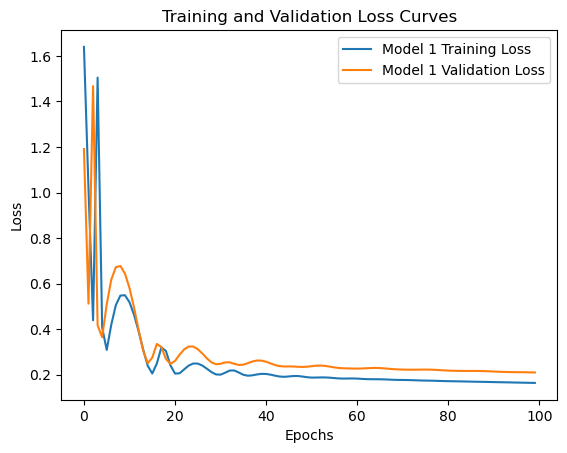

In [15]:
# Plot the training and validation loss curves
plt.plot(history1.history['loss'], label='Model 1 Training Loss')
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Observation and Analysis of Model 1**
1. Both the training and validation loss are converged.
2. The training loss and validation loss are low and slightly close to each other. This mild difference indicates that the model is quite a best fit.
3. The training loss decreases rapidly and converges to a low value at the beginning, this means that the model is learning efficiently from the data. 
4. The lower validation loss implies better generalization performance on unseen data.

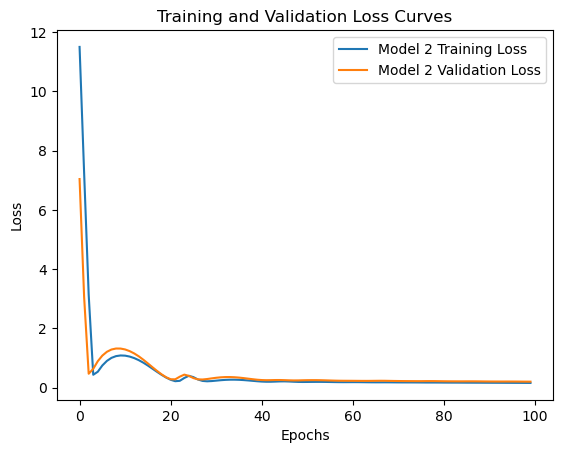

In [16]:
plt.plot(history2.history['loss'], label='Model 2 Training Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Observation and Analysis of Model 2**
1. Both the training and validation loss are converged.
2. The training loss are slightly lower than the validation loss. This difference indicates that the model is a best fit.
3. The training loss decreases rapidly and converges to a low value at the beginning, this means that the model is learning efficiently from the data. 
4. The lower validation loss implies better generalization performance on unseen data.

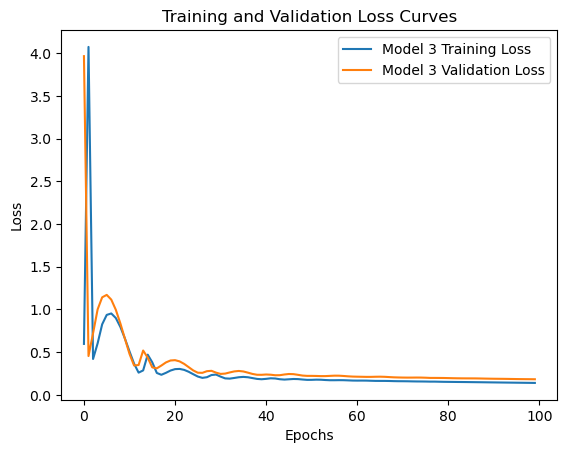

In [17]:
plt.plot(history3.history['loss'], label='Model 3 Training Loss')
plt.plot(history3.history['val_loss'], label='Model 3 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Observation and Analysis of Model 3**
1. Both the training and validation loss are converged.
2. The training loss and validation loss are low and  close to each other. This mild difference indicates that the model is a best fit.
3. The training loss decreases rapidly and converges to a low value at the beginning, this means that the model is learning efficiently from the data. 
4. The lower validation loss implies better generalization performance on unseen data.

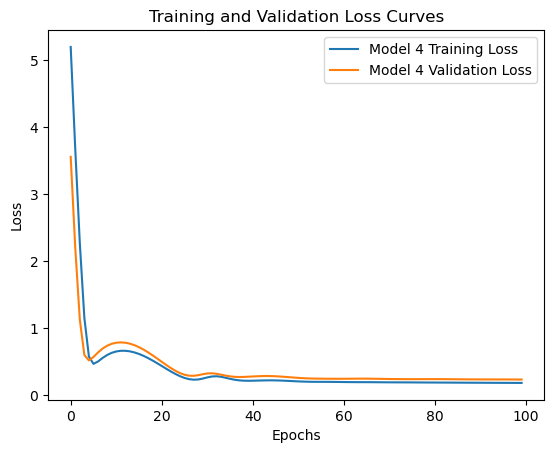

In [18]:
plt.plot(history4.history['loss'], label='Model 4 Training Loss')
plt.plot(history4.history['val_loss'], label='Model 4 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Observation and Analysis of Model 4**
1.  Both the training and validation loss are converged.
2. The training loss and validation loss are low and very close to each other. This indicates that the model is best fit.
3. The training loss decreases rapidly and converges to a low value at the beginning, this means that the model is learning efficiently from the data. 
4. The lower validation loss implies better generalization performance on unseen data.

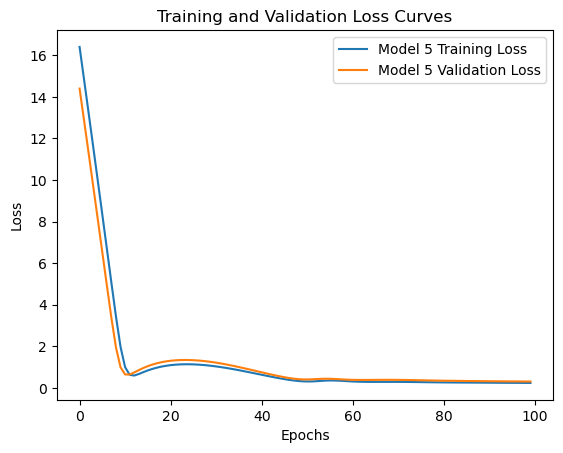

In [19]:
plt.plot(history5.history['loss'], label='Model 5 Training Loss')
plt.plot(history5.history['val_loss'], label='Model 5 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Observation and Analysis of Model 5**
1. Both the training and validation loss are converged. 
2. The training loss and validation loss are low and slightly close to each other. This mild difference indicates that the model is best fit.
3. The training loss decreases rapidly and converges to a low value at the beginning, this means that the model is learning efficiently from the data. 
4. The lower validation loss implies better generalization performance on unseen data.

In [20]:
# Predicting the model and Evaluation of validation set
predictions1 = model1.predict(X_val)
predictions2 = model2.predict(X_val)
predictions3 = model3.predict(X_val)
predictions4 = model4.predict(X_val)
predictions5 = model5.predict(X_val)


31/31 [==============================] - 0s 1ms/step


In [21]:
rounded1 = [int(round(x[0])) for x in predictions1]
rounded2 = [int(round(x[0])) for x in predictions2]
rounded3 = [int(round(x[0])) for x in predictions3]
rounded4 = [int(round(x[0])) for x in predictions4]
rounded5 = [int(round(x[0])) for x in predictions5]


<Axes: >

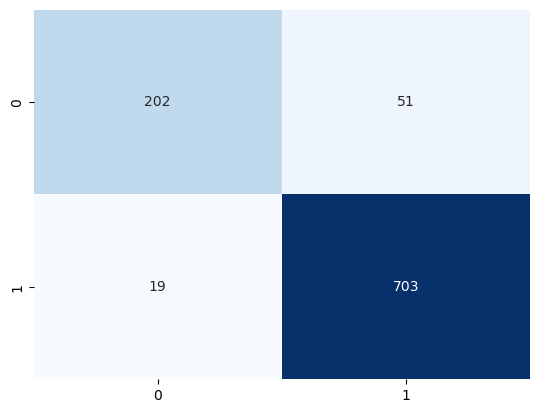

In [22]:
# Model 1 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [23]:
# Model 1 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded1)
print("Accuracy of the model 1: ", ac)

Accuracy of the model 1:  0.9282051282051282


<Axes: >

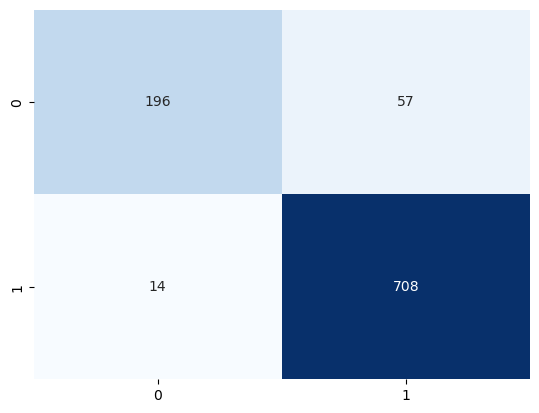

In [24]:
# Model 2 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [25]:
# Model 2 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded2)
print("Accuracy of the model 2: ", ac)

Accuracy of the model 2:  0.9271794871794872


<Axes: >

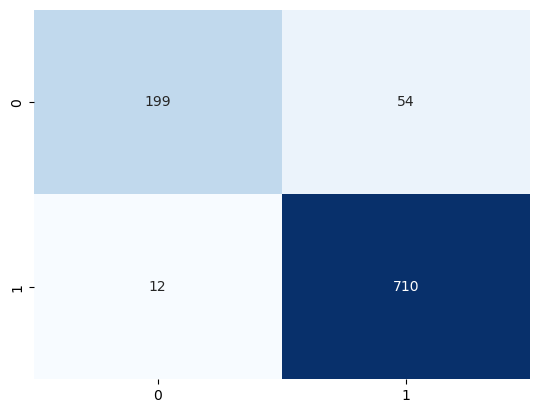

In [26]:
# Model 3 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded3)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [27]:
# Model 3 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded3)
print("Accuracy of the model 3: ", ac)

Accuracy of the model 3:  0.9323076923076923


<Axes: >

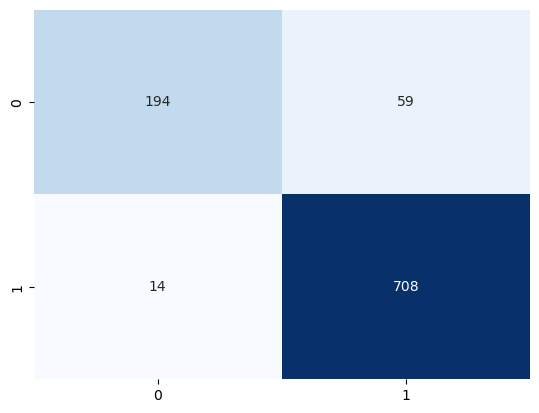

In [28]:
# Model 4 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [29]:
# Model 4 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded4)
print("Accuracy of the model 4: ", ac)

Accuracy of the model 4:  0.9251282051282051


<Axes: >

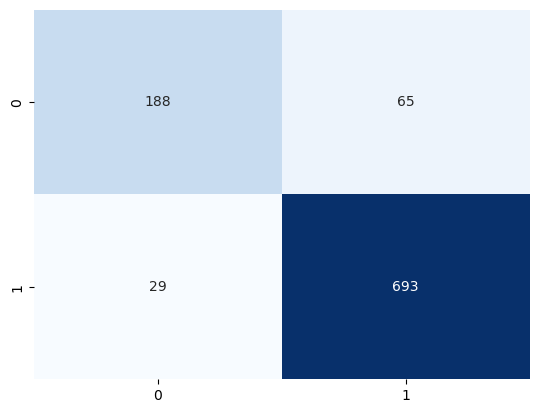

In [30]:
# Model 5 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded5)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [31]:
# Model 5 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded5)
print("Accuracy of the model 5: ", ac)

Accuracy of the model 5:  0.9035897435897436


## Step 3 : Model Tuning

The optimal model with the highest accuracy score is **model 3**.

Reasons:
1. lowest loss value
2. highest accuracy score

In [32]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Function to create the Keras model
def create_model(activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(256, activation=activation, input_dim=12))
    model.add(Dense(128, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [34]:
model = KerasClassifier(build_fn=create_model)


C:\Users\USER\AppData\Local\Temp\ipykernel_18520\4108180155.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


In [35]:
# Define the hyperparameters and their possible values
hyperparameters = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
}

In [36]:
# Create a grid search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, n_iter=10, cv=3)


In [37]:
# Perform random search with cross-validation
random_search.fit(X_train, y_train)

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.4504 - accuracy: 0.8759
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9284
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9367
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9439
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9512
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9518
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9581
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9597
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9597
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9571
Epoch 11/

48/48 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9861
Epoch 84/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9855
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9885
Epoch 86/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9894
Epoch 87/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9891
Epoch 88/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9881
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9885
Epoch 90/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9894
Epoch 91/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9891
Epoch 92/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9881
Epoch 93/100


48/48 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9822
Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9861
Epoch 66/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9828
Epoch 67/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9838
Epoch 68/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9848
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9865
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9868
Epoch 72/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9878
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9868
Epoch 74/100


48/48 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9772
Epoch 46/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9845
Epoch 47/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9871
Epoch 48/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9772
Epoch 49/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9825
Epoch 50/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9848
Epoch 51/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9842
Epoch 52/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9842
Epoch 53/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9855
Epoch 54/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9786
Epoch 55/100


95/95 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9469
Epoch 27/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9373
Epoch 28/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9442
Epoch 29/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9433
Epoch 30/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9429
Epoch 31/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9423
Epoch 32/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9446
Epoch 33/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9439
Epoch 34/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.9433
Epoch 35/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9406
Epoch 36/100


95/95 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9367
Epoch 8/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9380
Epoch 9/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1807 - accuracy: 0.9376
Epoch 10/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1804 - accuracy: 0.9396
Epoch 11/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1805 - accuracy: 0.9360
Epoch 12/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9350
Epoch 13/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.9357
Epoch 14/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1749 - accuracy: 0.9403
Epoch 15/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy: 0.9334
Epoch 16/100
95/95 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.9373
Epoch 17/100
95

95/95 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9505
Epoch 90/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9505
Epoch 91/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9489
Epoch 92/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9495
Epoch 93/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9442
Epoch 94/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9469
Epoch 95/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9456
Epoch 96/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9462
Epoch 97/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1485 - accuracy: 0.9475
Epoch 98/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9479
Epoch 99/100


95/95 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9495
Epoch 71/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9472
Epoch 72/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9485
Epoch 73/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9489
Epoch 74/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9453
Epoch 75/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9505
Epoch 76/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9453
Epoch 77/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9482
Epoch 78/100
95/95 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9485
Epoch 79/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9485
Epoch 80/100


24/24 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9802
Epoch 1/50
48/48 [==============================] - 2s 4ms/step - loss: 0.2725 - accuracy: 0.8911
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.9353
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1692 - accuracy: 0.9419
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9449
Epoch 5/50
48/48 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9505
Epoch 6/50
48/48 [==============================] - 0s 5ms/step - loss: 0.1257 - accuracy: 0.9581
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9604
Epoch 8/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9644
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0960 - accuracy: 0.9683
Epoch 10/50
48/48 [============

48/48 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9822
Epoch 33/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9812
Epoch 34/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9858
Epoch 35/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9845
Epoch 36/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0675 - accuracy: 0.9779
Epoch 37/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9838
Epoch 38/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9865
Epoch 39/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9855
Epoch 40/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9822
Epoch 41/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 42/50
48/48 [===

95/95 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9713
Epoch 14/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9782
Epoch 15/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9779
Epoch 16/50
95/95 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9769
Epoch 17/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9789
Epoch 18/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9809
Epoch 19/50
95/95 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9835
Epoch 20/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9822
Epoch 21/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9792
Epoch 22/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9822
Epoch 23/50
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9865
Epoch 46/50
95/95 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9868
Epoch 47/50
95/95 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9858
Epoch 48/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9878
Epoch 49/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9842
Epoch 50/50
48/48 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9881
Epoch 1/100
190/190 [==============================] - 2s 3ms/step - loss: 0.3520 - accuracy: 0.9043
Epoch 2/100
190/190 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9343
Epoch 3/100
190/190 [==============================] - 1s 3ms/step - loss: 0.2008 - accuracy: 0.9403
Epoch 4/100
190/190 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9508
Epoch 5/100
19

190/190 [==============================] - 1s 4ms/step - loss: 0.0403 - accuracy: 0.9881
Epoch 75/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9901
Epoch 76/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9885
Epoch 77/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0476 - accuracy: 0.9842
Epoch 78/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9881
Epoch 79/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9898
Epoch 80/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9901
Epoch 81/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9875
Epoch 82/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9875
Epoch 83/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 

190/190 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9835
Epoch 54/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9861
Epoch 55/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9875
Epoch 56/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9868
Epoch 57/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9891
Epoch 58/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9861
Epoch 59/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9894
Epoch 60/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9848
Epoch 61/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9885
Epoch 62/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 

190/190 [==============================] - 1s 4ms/step - loss: 0.0532 - accuracy: 0.9828
Epoch 33/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9812
Epoch 34/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0561 - accuracy: 0.9812
Epoch 35/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9819
Epoch 36/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9845
Epoch 37/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9819
Epoch 38/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9835
Epoch 39/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9852
Epoch 40/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9809
Epoch 41/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 

Epoch 12/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9370
Epoch 13/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9373
Epoch 14/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9343
Epoch 15/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9403
Epoch 16/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9400
Epoch 17/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9360
Epoch 18/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9393
Epoch 19/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9390
Epoch 20/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9409
Epoch 21/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9419
Epoch 22/5

Epoch 44/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9426
Epoch 45/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.9446
Epoch 46/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1633 - accuracy: 0.9459
Epoch 47/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9426
Epoch 48/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1623 - accuracy: 0.9449
Epoch 49/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.9433
Epoch 50/50
24/24 [==============================] - 1s 2ms/step - loss: 0.2101 - accuracy: 0.9301
Epoch 1/50
48/48 [==============================] - 1s 2ms/step - loss: 1.6117 - accuracy: 0.8381
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.9040
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9291
Epoch 4/50
48

95/95 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9795
Epoch 26/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9822
Epoch 27/50
95/95 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9733
Epoch 28/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9835
Epoch 29/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9812
Epoch 30/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9799
Epoch 31/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9789
Epoch 32/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9792
Epoch 33/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9828
Epoch 34/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9852
Epoch 35/50
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9571
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9558
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9634
Epoch 9/50
95/95 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9650
Epoch 10/50
95/95 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9650
Epoch 11/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9690
Epoch 12/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9664
Epoch 13/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9749
Epoch 14/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9746
Epoch 15/50
95/95 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9631
Epoch 16/50
95/95 [======

190/190 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 38/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9848
Epoch 39/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9855
Epoch 40/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9891
Epoch 41/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9868
Epoch 42/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9858
Epoch 43/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9815
Epoch 44/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9861
Epoch 45/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9885
Epoch 46/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9858
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9753
Epoch 17/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9789
Epoch 18/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9746
Epoch 19/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9766
Epoch 20/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9792
Epoch 21/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9756
Epoch 22/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9799
Epoch 23/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9822
Epoch 24/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9809
Epoch 25/50
190/190 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9822
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9403
Epoch 47/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9416
Epoch 48/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9426
Epoch 49/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9419
Epoch 50/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9433
Epoch 51/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9466
Epoch 52/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9413
Epoch 53/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9452
Epoch 54/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9472
Epoch 55/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 

190/190 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9360
Epoch 26/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9380
Epoch 27/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9360
Epoch 28/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9363
Epoch 29/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9380
Epoch 30/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9423
Epoch 31/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9396
Epoch 32/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9419
Epoch 33/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9380
Epoch 34/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 

190/190 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9248
Epoch 5/100
190/190 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9334
Epoch 6/100
190/190 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9314
Epoch 7/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9370
Epoch 8/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9317
Epoch 9/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9360
Epoch 10/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1916 - accuracy: 0.9357
Epoch 11/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1911 - accuracy: 0.9363
Epoch 12/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1895 - accuracy: 0.9406
Epoch 13/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1856 - accuracy: 0.936

190/190 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9479
Epoch 85/100
190/190 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9485
Epoch 86/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9453
Epoch 87/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1522 - accuracy: 0.9459
Epoch 88/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1529 - accuracy: 0.9466
Epoch 89/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1545 - accuracy: 0.9436
Epoch 90/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1546 - accuracy: 0.9456
Epoch 91/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1499 - accuracy: 0.9476
Epoch 92/100
190/190 [==============================] - 1s 3ms/step - loss: 0.1608 - accuracy: 0.9413
Epoch 93/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 

190/190 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9861
Epoch 64/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9795
Epoch 65/100
190/190 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9871
Epoch 66/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9848
Epoch 67/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9868
Epoch 68/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9894
Epoch 69/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9894
Epoch 70/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9852
Epoch 71/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9861
Epoch 72/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 

190/190 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9819
Epoch 43/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9828
Epoch 44/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 45/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0491 - accuracy: 0.9838
Epoch 46/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0467 - accuracy: 0.9845
Epoch 47/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9825
Epoch 48/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9838
Epoch 49/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0540 - accuracy: 0.9852
Epoch 50/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9845
Epoch 51/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 

190/190 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9825
Epoch 22/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9809
Epoch 23/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9802
Epoch 24/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9802
Epoch 25/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9819
Epoch 26/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9779
Epoch 27/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9819
Epoch 28/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 29/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9855
Epoch 30/100
190/190 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 

95/95 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9894
Epoch 1/100
285/285 [==============================] - 2s 2ms/step - loss: 0.2123 - accuracy: 0.9325
Epoch 2/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9428
Epoch 3/100
285/285 [==============================] - 1s 3ms/step - loss: 0.1420 - accuracy: 0.9532
Epoch 4/100
285/285 [==============================] - 1s 4ms/step - loss: 0.1134 - accuracy: 0.9657
Epoch 5/100
285/285 [==============================] - 1s 4ms/step - loss: 0.1172 - accuracy: 0.9604
Epoch 6/100
285/285 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9703
Epoch 7/100
285/285 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9727
Epoch 8/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9727
Epoch 9/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9729
Epoc

285/285 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9894
Epoch 81/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 82/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9916
Epoch 83/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 84/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9910
Epoch 85/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.9903
Epoch 86/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9877
Epoch 87/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0337 - accuracy: 0.9912
Epoch 88/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9910
Epoch 89/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C1EB992B60>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [16, 32, 64],
                                        'epochs': [50, 100],
                                        'optimizer': ['adam', 'sgd']})

In [38]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'optimizer': 'adam', 'epochs': 100, 'batch_size': 16, 'activation': 'relu'}


In [39]:
# Train the best model with the best hyperparameters on the entire training set
best_model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
285/285 [==============================] - 1s 2ms/step - loss: 0.4578 - accuracy: 0.9039
Epoch 2/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9268
Epoch 3/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9472
Epoch 4/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9534
Epoch 5/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9624
Epoch 6/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9642
Epoch 7/100
285/285 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9705
Epoch 8/100
285/285 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9714
Epoch 9/100
285/285 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9745
Epoch 10/100
285/285 [==============================] - 0s 2ms/step - loss: 0.0823 - accura

285/285 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9897
Epoch 82/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9908
Epoch 83/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9901
Epoch 84/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0340 - accuracy: 0.9903
Epoch 85/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0313 - accuracy: 0.9914
Epoch 86/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0397 - accuracy: 0.9883
Epoch 87/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 88/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9914
Epoch 89/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9853
Epoch 90/100
285/285 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 

## Step 4 : Model Evaluation

In [40]:
# Evaluate the best model on a separate testing set
test_accuracy = best_model.score(X_test, y_test)
val_accuracy = best_model.score(X_val, y_val)

61/61 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9836


In [41]:
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy for Testing:", test_accuracy)
print("Best Model Accuracy for Validation:", val_accuracy)

Best Hyperparameters: {'optimizer': 'adam', 'epochs': 100, 'batch_size': 16, 'activation': 'relu'}
Best Model Accuracy for Testing: 0.9876922965049744
Best Model Accuracy for Validation: 0.983589768409729


31/31 [==============================] - 0s 1ms/step
Accuracy of the model:  0.9876923076923076


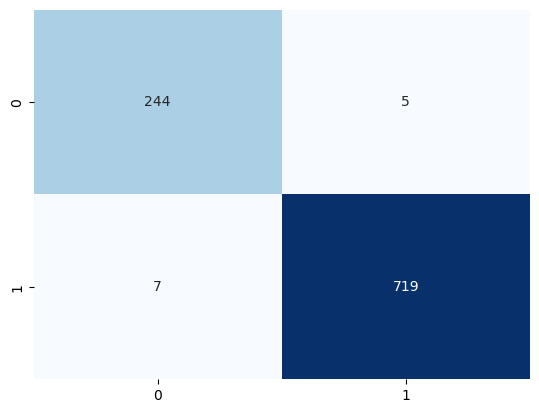

In [42]:
prediction = best_model.predict(X_test)
rounded = [int(round(x[0])) for x in prediction]

# Model Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rounded)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Model Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, rounded)
print("Accuracy of the model: ", ac)